In [46]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.linalg import rq

In [2]:
front_2Dcoord = np.load('front_image.npy', allow_pickle=True)
back_2Dcoord = np.load('back_image.npy', allow_pickle=True)
front_img = cv2.imread('front.png')

(12, 2) (12, 2)


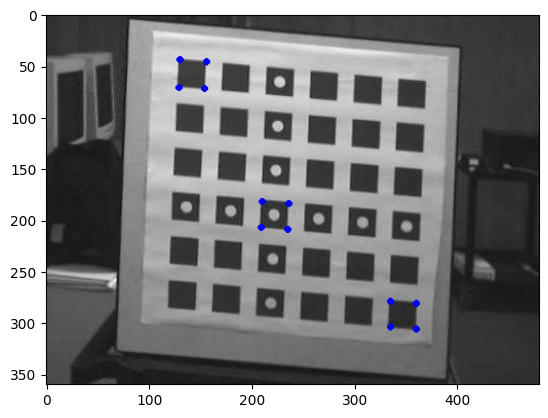

In [3]:
#visualization
print(front_2Dcoord.shape, back_2Dcoord.shape)
from copy import deepcopy
vis_img = deepcopy(front_img)
for i in range(front_2Dcoord.shape[0]):
    cv2.circle(vis_img, (int(front_2Dcoord[i,0]), int(front_2Dcoord[i,1])), 2, (255,0,0), 2)
plt.imshow(vis_img[:,:,::-1])
plt.show()

In [19]:
# ------------TODO----------------
# Compute corresponding 3D coordinate
# ------------TODO----------------
front_3Dcoord = np.zeros((12, 3))
back_3Dcoord = np.zeros((12, 3))
front_3Dcoord=np.array([[0,0,0],
                       [50,0,0],
                       [50,50,0],
                       [0,50,0],
                       [160,240,0],
                       [210,240,0],
                          [210,290,0],
                          [160,290,0],
                          [400,400,0],
                            [450,400,0],
                            [450,450,0],
                            [400,450,0]]
                    )
back_3Dcoord=np.array([[0,0,150],
                          [50,0,150],
                          [50,50,150],
                          [0,50,150],
                          [160,240,150],
                          [210,240,150],
                              [210,290,150],
                              [160,290,150],
                              [400,400,150],
                             [450,400,150],
                             [450,450,150],
                             [400,450,150]]
                    )
all_2Dcoord = np.concatenate((front_2Dcoord, back_2Dcoord), axis=0)
all_3Dcoord = np.concatenate((front_3Dcoord, back_3Dcoord), axis=0)
print(all_2Dcoord.shape, all_3Dcoord.shape)
print(all_2Dcoord)
print(all_3Dcoord)

(24, 2) (24, 3)
[[130.207   44.2962]
 [156.3471  46.5892]
 [154.9713  72.7293]
 [129.2898  71.3535]
 [210.4618 182.3344]
 [236.1433 184.1688]
 [235.6847 209.8503]
 [209.086  207.0987]
 [335.6592 279.5573]
 [360.4236 281.3917]
 [360.8822 306.1561]
 [335.2006 304.3217]
 [148.551   29.621 ]
 [174.2325  31.4554]
 [173.3153  57.1369]
 [147.1752  55.3025]
 [228.8057 166.742 ]
 [253.5701 168.1178]
 [253.5701 194.258 ]
 [227.4299 192.4236]
 [353.5446 263.965 ]
 [379.6847 265.7994]
 [378.7675 291.0223]
 [352.6274 289.1879]]
[[  0   0   0]
 [ 50   0   0]
 [ 50  50   0]
 [  0  50   0]
 [160 240   0]
 [210 240   0]
 [210 290   0]
 [160 290   0]
 [400 400   0]
 [450 400   0]
 [450 450   0]
 [400 450   0]
 [  0   0 150]
 [ 50   0 150]
 [ 50  50 150]
 [  0  50 150]
 [160 240 150]
 [210 240 150]
 [210 290 150]
 [160 290 150]
 [400 400 150]
 [450 400 150]
 [450 450 150]
 [400 450 150]]


In [21]:
# ------------TODO----------------
# Construct the Equation Pm=0 and solve m
# ------------TODO----------------
all_3Dcoord_ex=np.concatenate((all_3Dcoord, np.ones((24, 1))), axis=1)

P = np.zeros((48, 12))
m = np.zeros((12, 1))
p1=np.concatenate((all_3Dcoord_ex,np.zeros((24,4)), -all_3Dcoord_ex*all_2Dcoord[:,0].reshape(-1,1)), axis=1)
p2=np.concatenate((np.zeros((24,4)),all_3Dcoord_ex, -all_3Dcoord_ex*all_2Dcoord[:,1].reshape(-1,1)), axis=1)
P=np.concatenate((p1,p2), axis=0)
U, S, Vh = np.linalg.svd(P)
m = Vh[-1,:].reshape(12,1).astype(np.float64)
#print(P)
print(all_3Dcoord_ex.shape)
print(p1.shape)
print(p2.shape)
print(S[-1])
print(P.shape, U.shape, S.shape, Vh.shape,all_2Dcoord.shape, all_3Dcoord.shape)
print(m.shape)
print(Vh)
#print(P@m)

(24, 4)
(24, 12)
(24, 12)
0.035449377693590446
(48, 12) (48, 48) (12,) (12, 12) (24, 2) (24, 3)
(12, 1)
[[-1.22723935e-03 -1.29350255e-03 -2.72418919e-04 -3.44134107e-06
  -9.77610235e-04 -1.03755985e-03 -2.02255579e-04 -2.71982261e-06
   6.86755761e-01  7.13204089e-01  1.40349007e-01  1.81171796e-03]
 [-1.86008400e-04 -5.31809641e-04 -2.62118261e-03 -7.90478279e-06
   2.40775357e-04 -2.07250619e-05 -1.57163157e-03 -2.44012331e-06
  -1.65254049e-01 -3.48388311e-02  9.85629617e-01  1.37709184e-03]
 [ 1.47781843e-04 -3.24180667e-03 -6.35297575e-05 -1.20493030e-05
  -7.32746862e-04 -3.46037472e-03 -4.21124827e-04 -1.44852711e-05
  -7.07847529e-01  7.00062816e-01 -9.39431226e-02  3.92366779e-03]
 [-4.18263084e-01 -4.55084614e-01 -9.40781026e-02 -1.27678482e-03
   5.23397675e-01  5.64620402e-01  1.27797010e-01  1.59683344e-03
  -6.02694209e-04  6.74182666e-04 -5.71033024e-04  4.95723696e-03]
 [ 1.35378867e-01  1.57252890e-01  2.70557073e-01  4.85898682e-03
   1.40832669e-01  1.57220380e-01 

In [50]:
# ------------TODO----------------
# Solve K, and [R T] from m
# ------------TODO----------------
# 从投
m=m.reshape(3,4)
print(m)
M = m[:, :3]  
K, R = rq(M)
print(R.shape, K.shape)
D = np.diag(np.sign(np.diag(K)))
K = K @ D
R = D @ R
rho=K[2,2]
# 归一化K


# 计算平移向量T
T = np.linalg.inv(K) @ m[:, 3:]
K=K/rho
print(T)
print(K)
print(R)


[[ 3.86081985e-03 -1.14839115e-04  8.75272791e-04  9.46068598e-01]
 [ 3.42814033e-04  3.92515324e-03 -7.51681648e-04  3.23835234e-01]
 [-6.97426063e-08  8.23266293e-08 -1.33752675e-08  7.29214554e-03]]
(3, 3) (3, 3)
[[383001.84283735]
 [-67357.81804797]
 [ 67071.1134261 ]]
[[ 8.79502201e+03  2.54151912e+04 -2.45693869e+04]
 [ 0.00000000e+00  2.60097274e+04  2.61653183e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.03052016  0.18542639  0.98218408]
 [ 0.76653829  0.62628989 -0.14205641]
 [-0.64147297  0.75721729 -0.12302197]]


In [51]:
# save results
save_dict = {'3Dcoord': all_3Dcoord, 'P':P, 'm':m, 'K':K, 'R':R, 'T':T}
np.save('../results/calibr', save_dict)

# The reference answer of T should be [383001.8386981  -67357.81794783  67071.11338303]
# The results are very strange because the data is fake.

FileNotFoundError: [Errno 2] No such file or directory: '../results/calibr.npy'